# Тестируем библиотеки на Циане

In [1]:
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from memory_profiler import profile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.extensions = [
   'autoreload',
   'memory_profiler']

sys.path.insert(0, 'parsers/bs4')
sys.path.insert(0, 'parsers/scrapy')
%load_ext memory_profiler

In [2]:
# Загружаем файлы
html_source_list_bs4 = ['tests/cian/test_source/test{0}.html'.format(i) for i in range(1, 51)]
html_source_list_scrapy = ['file:/tests/cian/test_source/test{0}.html'.format(i) for i in range(1, 51)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())
        
def select_pages(page_limit, pages):
    return pages[:page_limit]


### BeautifulSoup

In [3]:
from parsers.bs4.cian_parser import parse_cian_bs4
from parsers.bs4.parse_bs4 import parse_bs4

In [4]:
bs_time_measure = []
for page_limit in tqdm(range(1, 51, 5)):
    pages = select_pages(page_limit, html_files)
    cian_data = []
    
    # замеряем время
    s = time.time()
    parse_bs4(parse_cian_bs4, pages, cian_data)
    t = time.time()
    
    bs_time_measure.append(t-s)

100%|██████████| 10/10 [00:00<00:00, 13264.72it/s]


In [5]:
cian_dataFrame = pd.DataFrame()
cian_dataFrame = pd.concat([pd.DataFrame(i) for i in cian_data], ignore_index = True)
cian_dataFrame

,name,price,location
0,"1-комн. кв., 41,98 м², 3/10 этаж",14 273 200 ₽,"Санкт-Петербург,р-н Московский,Московская заст..."
1,"1-комн. кв., 40 м², 22/26 этаж",6 300 000 ₽,"Санкт-Петербург,р-н Выборгский,мкр. Парголово,..."
2,"1-комн. кв., 48,9 м², 2/9 этаж",13 141 632 ₽,"Санкт-Петербург,р-н Красногвардейский,Малая Ох..."
3,"1-комн. апарт., 52,77 м², 9/18 этаж",10 627 350 ₽,"Санкт-Петербург,р-н Фрунзенский,Волковское,м. ..."
4,"1-комн. кв., 36,84 м², 5/12 этаж",8 440 000 ₽,"Санкт-Петербург,р-н Выборгский,Сампсониевское,..."
...,...,...,...
1202,"1-комн. кв., 42 м², 5/9 этаж",17 000 ₽/мес.,"Омская область,Омск,Советский,мкр. Город Нефтя..."
1203,"1-комн. кв., 49 м², 15/16 этаж",21 000 ₽/мес.,"Омская область,Омск,Кировский,проспект Комаров..."
1204,"1-комн. кв., 30 м², 4/5 этаж",15 000 ₽/мес.,"Омская область,Омск,Советский,мкр. Город Нефтя..."
1205,"1-комн. кв., 24 м², 5/5 этаж",12 000 ₽/мес.,"Омская область,Омск,Советский,мкр. Город Нефтя..."


### Scrapy

In [6]:
from parsers.scrapy.cianSpider import cianSpider
from parsers.scrapy.parse_scrapy import parse_scrapy

In [7]:
scrapy_time_measure = []
for page_limit in tqdm(range(1, 51, 5)):
    pages = select_pages(page_limit, html_source_list_scrapy)
    cian_data = []
    
    # замеряем время
    s = time.time()
    parse_scrapy(cianSpider, pages, cian_data)
    t = time.time()
    
    scrapy_time_measure.append(t-s)

100%|██████████| 10/10 [01:05<00:00,  6.52s/it]


In [8]:
cian_dataFrame = pd.DataFrame(cian_data)
cian_dataFrame

,name,price,location
0,"1-комн. кв., 41,98 м², 3/10 этаж",14 273 200 ₽,"[Санкт-Петербург, р-н Московский, Московская з..."
1,"1-комн. кв., 40 м², 22/26 этаж",6 300 000 ₽,"[Санкт-Петербург, р-н Выборгский, мкр. Парголо..."
2,"1-комн. кв., 48,9 м², 2/9 этаж",13 141 632 ₽,"[Санкт-Петербург, р-н Красногвардейский, Малая..."
3,"2-комн. кв., 46,9 м², 7/10 этаж",16 884 000 ₽,"[Санкт-Петербург, р-н Московский, Московская з..."
4,"3-комн. кв., 68,14 м², 4/10 этаж",23 167 600 ₽,"[Санкт-Петербург, р-н Московский, Московская з..."
...,...,...,...
1202,"1-комн. кв., 42 м², 5/9 этаж",17 000 ₽/мес.,"[Омская область, Омск, Советский, мкр. Город Н..."
1203,"1-комн. кв., 49 м², 15/16 этаж",21 000 ₽/мес.,"[Омская область, Омск, Кировский, проспект Ком..."
1204,"1-комн. кв., 30 м², 4/5 этаж",15 000 ₽/мес.,"[Омская область, Омск, Советский, мкр. Город Н..."
1205,"1-комн. кв., 24 м², 5/5 этаж",12 000 ₽/мес.,"[Омская область, Омск, Советский, мкр. Город Н..."


## Сравниваем время работы

### BeautifulSoup

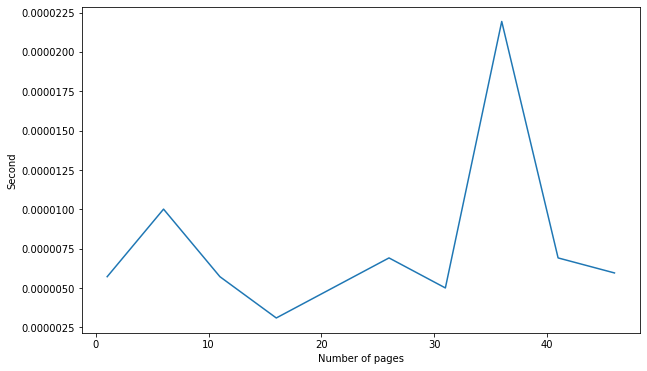

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 51, 5), bs_time_measure)
plt.xlabel("Number of pages")
plt.ylabel("Second")
plt.show()

### Scrapy

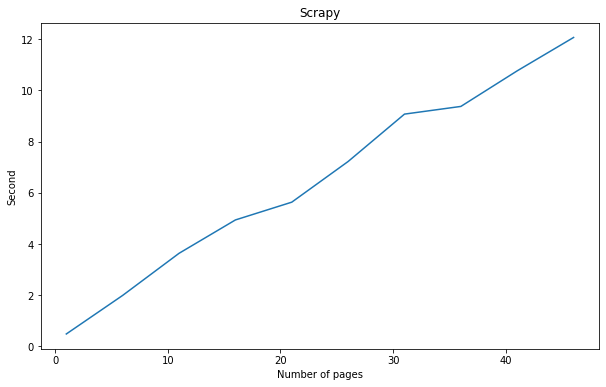

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 51, 5), scrapy_time_measure)
plt.title("Scrapy")
plt.xlabel("Number of pages")
plt.ylabel("Second")
plt.show()

## Сравниваем используемую память

### BeautifulSoup

In [11]:
%%file memory/memory_bs4_cian.py

from parsers.bs4.cian_parser import parse_cian_bs4
from parsers.bs4.parse_bs4 import parse_bs4

html_source_list_bs4 = ['tests/cian/test_source/test{0}.html'.format(i) for i in range(1, 51)]
html_source_list_scrapy = ['file:/tests/cian/test_source/test{0}.html'.format(i) for i in range(1, 51)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())
        
def select_pages(page_limit, pages):
    return pages[:page_limit]

@profile
def test_bs4():
    for page_limit in range(1, 51):
        pages = select_pages(page_limit, html_files)
        habr_data = []

        parse_bs4(parse_cian_bs4, pages, habr_data)
        
test_bs4()

Overwriting memory/memory_bs4_cian.py


In [12]:
!python -m memory_profiler memory/memory_bs4_cian.py

Filename: memory/memory_bs4_cian.py

Line #    Mem usage    Increment  Occurences   Line Contents
    16  199.113 MiB  199.113 MiB           1   @profile
    17                                         def test_bs4():
    18  199.141 MiB    0.004 MiB          51       for page_limit in range(1, 51):
    19  199.141 MiB    0.000 MiB          50           pages = select_pages(page_limit, html_files)
    20  199.141 MiB    0.000 MiB          50           habr_data = []
    21                                         
    22  199.141 MiB    0.023 MiB          50           parse_bs4(parse_cian_bs4, pages, habr_data)




### Scrapy

In [13]:
%%file memory/memory_scrapy_cian.py

from parsers.scrapy.habrSpider import habrSpider
from parsers.scrapy.parse_scrapy import parse_scrapy

html_source_list_bs4 = ['tests/cian/test_source/test{0}.html'.format(i) for i in range(1, 51)]
html_source_list_scrapy = ['file:/tests/cian/test_source/test{0}.html'.format(i) for i in range(1, 51)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())

def select_pages(page_limit, pages):
    return pages[:page_limit]

@profile
def test_scrapy():
    for page_limit in range(1, 51):
        pages = select_pages(page_limit, html_files)
        habr_data = []

        parse_scrapy(habrSpider, pages, habr_data)
        
test_scrapy()

Overwriting memory/memory_scrapy_cian.py


In [14]:
!python -m memory_profiler memory/memory_scrapy_cian.py

Filename: memory/memory_scrapy_cian.py

Line #    Mem usage    Increment  Occurences   Line Contents
    16  213.328 MiB  213.328 MiB           1   @profile
    17                                         def test_scrapy():
    18  356.910 MiB -3016.105 MiB          51       for page_limit in range(1, 51):
    19  356.910 MiB -2970.629 MiB          50           pages = select_pages(page_limit, html_files)
    20  356.910 MiB -2970.629 MiB          50           habr_data = []
    21                                         
    22  356.910 MiB -2872.531 MiB          50           parse_scrapy(habrSpider, pages, habr_data)


